# Objekteigenschaften zum Auslösungszeitpunkt

Um einen Überblick über typische Objkekteigenschaften zum Auslösungszeitpunkt zu bekommen sehen wir uns folgende Objekteigenschaften der zu den HACI-Objekteten gehörenden Satellitenobjekte zum Auslösungszeitpunkt an:

* <i>T</i><sub>B</sub>(10,8&thinsp;µm)
* mittlere Wolkenhöhe, maximale Woklkenhöhe
* Objektfläche

In [133]:
import numpy as np
import xarray as xr
import seaborn as sns
import pandas as pd
sns.set_context("talk")

import matplotlib.pyplot as plt

from standard_config import *

import sys
sys.path.append("{}/utils/io".format(local_home_path))
import file_io as fio
import io_config as ioc

import glob

sys.path.append("{}/utils/tracking".format(local_home_path))
import segmentation as oseg
import object_tracking as ot

from plotting_tools.colormaps import enhanced_colormap
emap = enhanced_colormap()

import fixed_colourbar as fc

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import nwcsaf_ct_cmap as ct_cmap

## 1. Gut isolierte Fälle

Für die gefilterten HACI-Fälle wurden MSG-Daten und NWCSAF-Produkte für einen 25&thinsp;px&thinsp;&times;&thinsp;25&thinsp;px - Ausschnitt um den parallaxenkorrigierten HACI-Objektschwerpunkt ausgeschnitten. Wir sehen uns zunächst die Objekteigenschaften für den Fall im HRV-Paper in Abhängigkeit von der Objektfläche an.

In [34]:
example_case_data = fio.read_nc_file("{}/track_20130618_2687.nc".format(ioc.haci_track_data_path))

In [38]:
haci_data = pd.read_csv("{}/haci-2013-06-18-bbox.dat".format(ioc.haci_bbox_data_path),sep="\s+")

In [41]:
haci_data[haci_data.id==2687]

date   time    id  flags   t0   t1  l00  l01  c00  c01   l0   l1  \
1571  2013-06-18  13:50  2687      0  166  188  386  392  615  619  381  404   

       c0   c1  
1571  607  638

Text(0.5, 1.0, 'IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt')

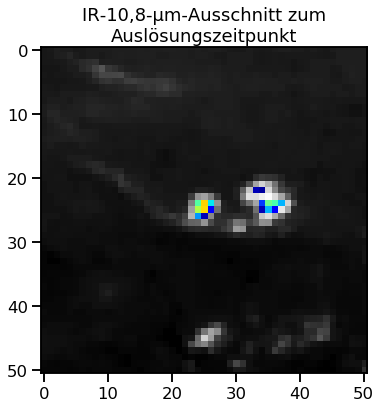

In [35]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(example_case_data['ir108'][6],vmin=210,vmax=300,cmap=emap)
ax.set_title("IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt")

Als nächstes versuchen wir Objekt(e) zu finden.

In [90]:
objects = np.array([oseg.segment_local_threshold(ir,
                                                minimum_depth = 5,
                                                tmax = 273.15, tmin = 220,thresh_min = 240, spread = 5) 
                   for ir in example_case_data['ir108']])

In [ ]:
local_minima = extr

Text(0.5, 1.0, 'IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt mit Objekten')

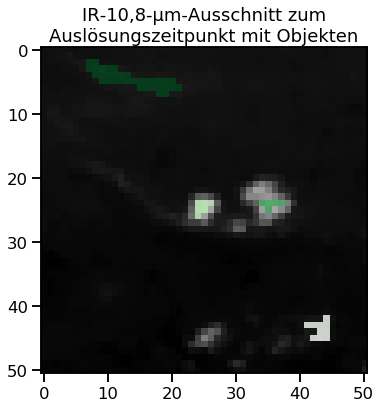

In [94]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(example_case_data['ir108'][6],vmin=210,vmax=300,cmap='gray_r')
ax.imshow(np.ma.masked_less(objects[6],1),alpha=0.8,cmap='Greens_r')
ax.set_title("IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt mit Objekten")

In [168]:
test = xr.open_dataset("{}/track_20130618_2687.nc".format(ioc.haci_track_data_path))

In [174]:
mst.get_nwcsaf_prod?

In [219]:
time = test.time.data[6]

In [220]:
data_shape = test.ir108.data[6].shape
half_shape = data_shape[0]//2
cutout_index = gi.get_index_kdtree(np.array([[test.slon.data[half_shape,half_shape]],
                                             [test.slat.data[half_shape,half_shape]]]),slon,slat)

In [221]:
test.slon.data[half_shape,half_shape], test.slat.data[half_shape,half_shape]

(11.256345999999999, 50.50324)

In [222]:
cutout_index

[(175, 539)]

In [223]:
time = pd.Timestamp(time).to_pydatetime()
ct_data = mst.get_nwcsaf_prod('CT',time,'rss','none','eu',calibrate=True)
ctth_data = mst.get_nwcsaf_prod('CTTH_HEIGHT',time,'rss','none','eu',calibrate=True)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [225]:
ct_corr = parallax_correct_msg(ct_data,slon,slat,ctth_data,'std','eu','rss',3)
ctth_corr = parallax_correct_msg(ctth_data,slon,slat,ctth_data,'std','eu','rss',3)

ct_corr_cutout = gi.cutout_field4box(ct_corr,cutout_index[0],51)
ctth_corr_cutout = gi.cutout_field4box(ctth_corr,cutout_index[0],51)

In [228]:
test

<xarray.Dataset>
Dimensions:  (hx: 153, hy: 153, rax: 306, ray: 153, sx: 51, sy: 51, time: 13)
Coordinates:
  * time     (time) datetime64[ns] 2013-06-18T13:20:00 ... 2013-06-18T14:20:00
    slon     (sx, sy) float64 10.15 10.2 10.24 10.29 ... 12.17 12.21 12.25 12.3
    slat     (sx, sy) float64 51.89 51.89 51.89 51.89 ... 49.18 49.18 49.18
    hlon     (hx, hy) float64 ...
    hlat     (hx, hy) float64 ...
    rlon     (rax, ray) float64 ...
    rlat     (rax, ray) float64 ...
Dimensions without coordinates: hx, hy, rax, ray, sx, sy
Data variables:
    vis006   (time, sx, sy) float64 ...
    vis008   (time, sx, sy) float64 ...
    ir016    (time, sx, sy) float64 ...
    ir039    (time, sx, sy) float64 ...
    wv062    (time, sx, sy) float64 ...
    wv073    (time, sx, sy) float64 ...
    ir087    (time, sx, sy) float64 ...
    ir097    (time, sx, sy) float64 ...
    ir108    (time, sx, sy) float64 294.6 294.0 293.3 ... 298.5 293.1 284.2
    ir120    (time, sx, sy) float64 ...
    ir13

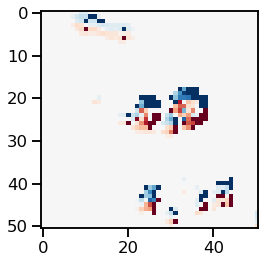

In [227]:
plt.imshow(ctth_corr_cutout-example_case_data['ctth'][6],vmin=-10000,vmax=10000,cmap='RdBu_r')

In [231]:
ct = []
ctth = []
cma = []
# Daten ausschneiden 
for i,time in enumerate(test.time.data):
    time = pd.Timestamp(time).to_pydatetime()
    ct_data = mst.get_nwcsaf_prod('CT',time,'rss','none','eu',calibrate=True)
    ctth_data = mst.get_nwcsaf_prod('CTTH_HEIGHT',time,'rss','none','eu',calibrate=True)
    cma_data = mst.get_nwcsaf_prod('CMa',time,'rss','none','eu',calibrate=True)

    ct_corr = parallax_correct_msg(ct_data,slon,slat,ctth_data,'std','eu','rss',3)
    ctth_corr = parallax_correct_msg(ctth_data,slon,slat,ctth_data,'std','eu','rss',3)
    cma_corr = parallax_correct_msg(cma_data,slon,slat,ctth_data,'std','eu','rss',3)

    ct_corr_cutout = gi.cutout_field4box(ct_corr,cutout_index[0],data_shape[0])
    ctth_corr_cutout = gi.cutout_field4box(ctth_corr,cutout_index[0],data_shape[0])
    cma_corr_cutout = gi.cutout_field4box(cma_corr,cutout_index[0],data_shape[0])

    ct.append(ct_corr_cutout)
    ctth.append(ctth_corr_cutout)
    cma.append(cma_corr_cutout)

In [232]:
ct

[array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1., 19.],
        [ 1.,  1.,  1., ...,  1.,  1., 19.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32),
 array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  6.],
        [ 1.,  1.,  1., ..., 19.,  1.,  6.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32),
 array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [19.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ..., 19.,  1., 19.],
        [ 1.,  1.,  1., ...,  1.,  1., 19.]], dtype=float32),
 array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 

In [234]:
ds = test.copy(deep=True)

In [235]:
test.close()

In [236]:
ds

<xarray.Dataset>
Dimensions:  (hx: 153, hy: 153, rax: 306, ray: 153, sx: 51, sy: 51, time: 13)
Coordinates:
  * time     (time) datetime64[ns] 2013-06-18T13:20:00 ... 2013-06-18T14:20:00
    slon     (sx, sy) float64 10.15 10.2 10.24 10.29 ... 12.17 12.21 12.25 12.3
    slat     (sx, sy) float64 51.89 51.89 51.89 51.89 ... 49.18 49.18 49.18
    hlon     (hx, hy) float64 10.14 10.15 10.17 10.18 ... 12.27 12.28 12.3 12.31
    hlat     (hx, hy) float64 51.91 51.91 51.91 51.91 ... 49.16 49.16 49.16
    rlon     (rax, ray) float64 10.23 10.24 10.25 10.27 ... 12.33 12.34 12.36
    rlat     (rax, ray) float64 49.18 49.18 49.18 49.18 ... 51.76 51.76 51.76
Dimensions without coordinates: hx, hy, rax, ray, sx, sy
Data variables:
    vis006   (time, sx, sy) float64 0.0761 0.0661 0.0661 ... 0.1282 0.2454
    vis008   (time, sx, sy) float64 0.2872 0.2481 0.2148 ... 0.2297 0.3239
    ir016    (time, sx, sy) float64 0.1537 0.1281 0.1176 ... 0.1071 0.191 0.2166
    ir039    (time, sx, sy) float64 297.

In [237]:
ct = xr.DataArray(ct,
                  dims=['time','x','y'])
ds['ct'] = ct  

ctth = xr.DataArray(ctth,
                    dims=['time','x','y'])
ds['ctth'] = ctth

cma = xr.DataArray(cma,
                   dims=['time','x','y'])
ds['cma'] = cma  

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/xarray/core/dataarray.py:219: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


In [238]:
ds

<xarray.Dataset>
Dimensions:  (hx: 153, hy: 153, rax: 306, ray: 153, sx: 51, sy: 51, time: 13, x: 51, y: 51)
Coordinates:
  * time     (time) datetime64[ns] 2013-06-18T13:20:00 ... 2013-06-18T14:20:00
    slon     (sx, sy) float64 10.15 10.2 10.24 10.29 ... 12.17 12.21 12.25 12.3
    slat     (sx, sy) float64 51.89 51.89 51.89 51.89 ... 49.18 49.18 49.18
    hlon     (hx, hy) float64 10.14 10.15 10.17 10.18 ... 12.27 12.28 12.3 12.31
    hlat     (hx, hy) float64 51.91 51.91 51.91 51.91 ... 49.16 49.16 49.16
    rlon     (rax, ray) float64 10.23 10.24 10.25 10.27 ... 12.33 12.34 12.36
    rlat     (rax, ray) float64 49.18 49.18 49.18 49.18 ... 51.76 51.76 51.76
Dimensions without coordinates: hx, hy, rax, ray, sx, sy, x, y
Data variables:
    vis006   (time, sx, sy) float64 0.0761 0.0661 0.0661 ... 0.1282 0.2454
    vis008   (time, sx, sy) float64 0.2872 0.2481 0.2148 ... 0.2297 0.3239
    ir016    (time, sx, sy) float64 0.1537 0.1281 0.1176 ... 0.1071 0.191 0.2166
    ir039    (time, 

Das Objekt, das zu dem HACI-Fall gehört, ist das in der Mitte.

In [95]:
wanted_object_id = ot.get_wanted_object_id(objects)

In [96]:
object_mask = np.ma.masked_equal(objects[6],wanted_object_id).mask*1

Text(0.5, 1.0, 'IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt mit Objekten')

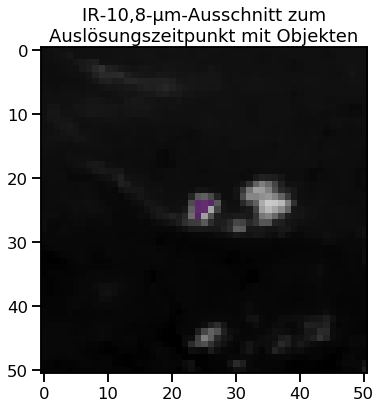

In [98]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(example_case_data['ir108'][6],vmin=210,vmax=300,cmap='gray_r')
ax.imshow(np.ma.masked_less(object_mask,1),alpha=0.8)
ax.set_title("IR-10,8-µm-Ausschnitt zum\nAuslösungszeitpunkt mit Objekten")

In [104]:
object_area = np.count_nonzero(object_mask)
print(u"Objektfläche = {} px² \N{ALMOST EQUAL TO} {} km²".format(object_area, object_area * 21.744))

Objektfläche = 6 px² ≈ 130.464 km²


Das Objekt umfasst den kalten Kernbereich der Wolke und ist mit einer Fläche von ca. 131&thinsp;km<sup>2</sup> nicht besonders groß.

Damit können wir jetzt die entsprechenden Objektwerte heraussuchen.

In [123]:
def get_object_values(value_field,object_mask):
    object_values = value_field[np.where(object_mask!=0)]
    
    stat_functions = {'min':np.min,
                       'max':np.max,
                       'mean':np.mean,
                       'q25':np.percentile,
                       'q75':np.percentile,
                       'q50':np.median}
    
    object_stats = {f:[] for f in stat_functions.keys()}
    
    for func in stat_functions.keys():
            if func in ['q25','median','q75']:
                object_stats[func] = np.percentile(object_values,float(func[1:]))
            else:
                object_stats[func] = stat_functions[func](object_values)
                
    return (object_values, object_stats)

In [127]:
object_values = {val_id:[] for val_id in list(example_case_data.keys())[:15]}
object_stats = {val_id:[] for val_id in list(example_case_data.keys())[:15]}

for k in list(example_case_data.keys())[:15]:
    if k == 'hrv':
        om = object_mask.repeat(3,axis=0).repeat(3,axis=1)
    else:
        om = object_mask
        
    obj_val, obj_stat = get_object_values(example_case_data[k][6],
                                          om)

    object_values[k] = obj_val
    object_stats[k] = obj_stat

In [128]:
object_values

{'vis006': array([0.5218, 0.5238, 0.4096, 0.5859, 0.5748, 0.4757]),
 'vis008': array([0.5743, 0.6283, 0.5238, 0.6329, 0.6524, 0.5502]),
 'ir016': array([0.2783, 0.283 , 0.2539, 0.2923, 0.2655, 0.2096]),
 'ir039': array([264.1537, 259.6469, 264.8836, 258.7179, 254.5359, 255.1063]),
 'wv062': array([222.5993, 214.9614, 216.1011, 223.1377, 213.92  , 228.8962]),
 'wv073': array([228.0592, 214.6103, 217.4903, 227.5109, 213.7752, 235.2582]),
 'ir087': array([238.7777, 224.8986, 233.6133, 230.5066, 221.4291, 240.697 ]),
 'ir097': array([235.7787, 227.7444, 229.0506, 233.1217, 226.0132, 236.1018]),
 'ir108': array([229.8409, 221.2945, 233.4218, 226.0313, 221.9499, 236.2978]),
 'ir120': array([232.8354, 220.8875, 229.2554, 228.7287, 219.9884, 239.2805]),
 'ir134': array([232.4965, 220.6217, 223.8961, 230.2243, 219.6862, 237.4749]),
 'hrv': array([0.73375065, 0.67078855, 0.66352369, 0.60540483, 0.46616172,
        0.38624828, 0.3765618 , 0.33176184, 0.23489707, 0.60419402,
        0.68410745, 0.

In [129]:
object_stats

{'vis006': {'min': 0.4096,
  'max': 0.5859,
  'mean': 0.5152666666666667,
  'q25': 0.487225,
  'q75': 0.5620499999999999,
  'q50': 0.5228},
 'vis008': {'min': 0.5238,
  'max': 0.6524,
  'mean': 0.5936500000000001,
  'q25': 0.556225,
  'q75': 0.63175,
  'q50': 0.6013000000000001},
 'ir016': {'min': 0.2096,
  'max': 0.2923,
  'mean': 0.26376666666666665,
  'q25': 0.25680000000000003,
  'q75': 0.281825,
  'q50': 0.27190000000000003},
 'ir039': {'min': 254.5359,
  'max': 264.8836,
  'mean': 259.50738333333334,
  'q25': 256.00919999999996,
  'q75': 263.027,
  'q50': 259.18240000000003},
 'wv062': {'min': 213.92000000000002,
  'max': 228.89620000000002,
  'mean': 219.93594999999996,
  'q25': 215.24632499999998,
  'q75': 223.00310000000002,
  'q50': 219.3502},
 'wv073': {'min': 213.7752,
  'max': 235.25820000000002,
  'mean': 222.78401666666664,
  'q25': 215.33030000000002,
  'q75': 227.922125,
  'q50': 222.50060000000002},
 'ir087': {'min': 221.4291,
  'max': 240.697,
  'mean': 231.653716666

Das Beispielobjekt hat eine Fläche 5&thinsp;px<sup>2</sup> und hat eine mittlere Wolkenhöhe von 7&thinsp;km und eine mittlere IR-10,8-µm-Temperatur von ca. 230&thinsp;K. Das Objekt ist (noch) nicht besonders groß und hoch hat aber eine geschätzte Dicke von mindestens 5&thinsp;km uns ist bereits teilweise vereist.

In [134]:
cmap_ct, norm_ct, names_ct = ct_cmap.nwcsaf_ct_cmap()

Text(0.5, 1.0, 'NWCSAF CTTH')

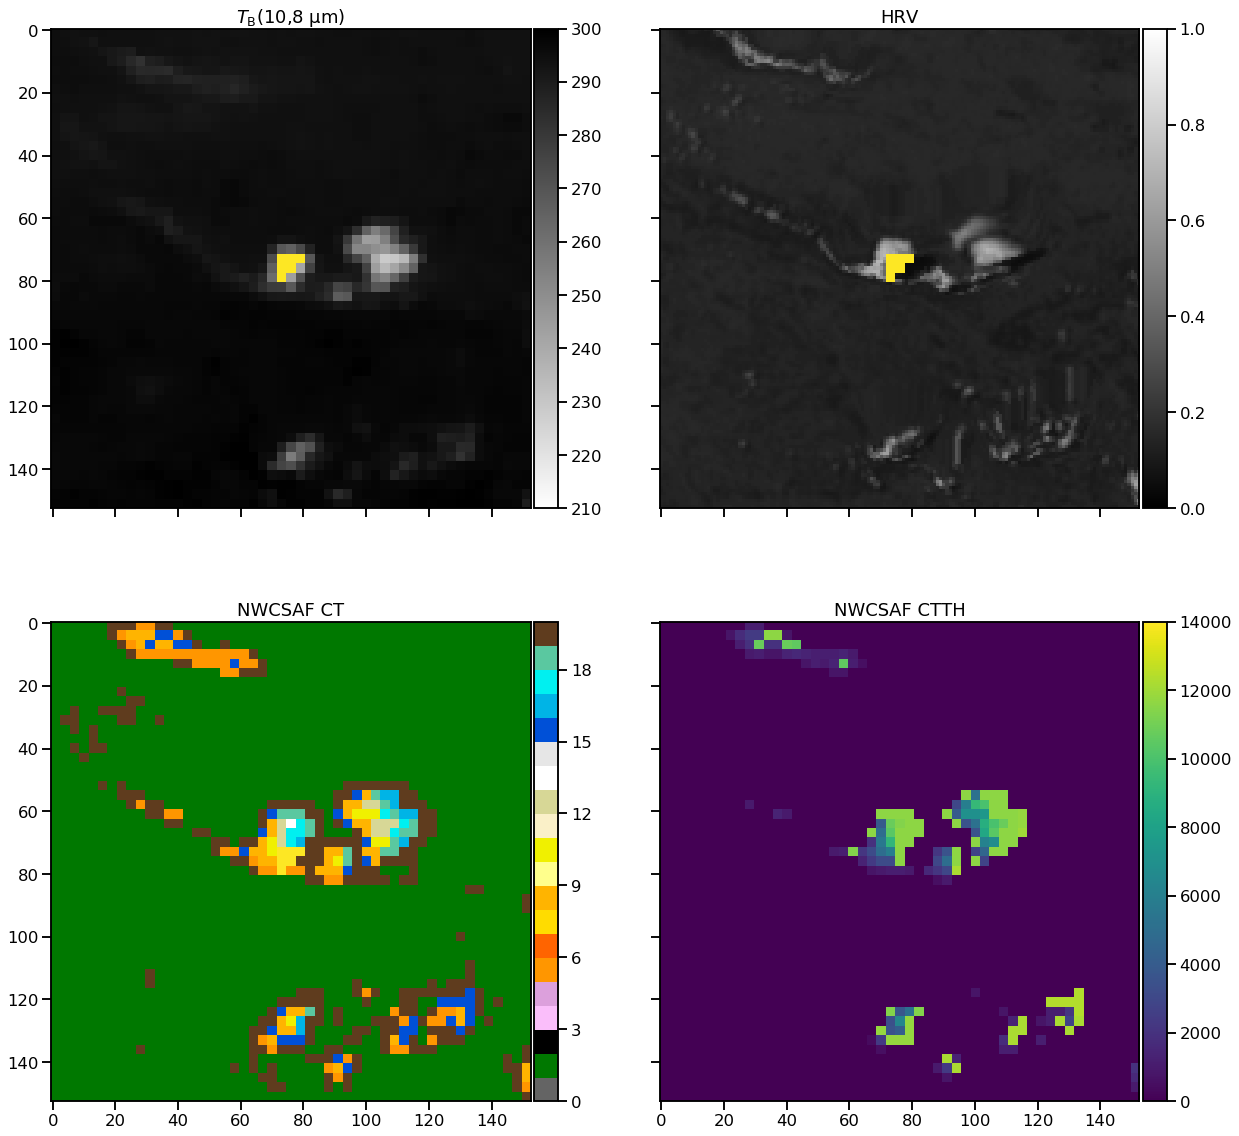

In [152]:
fig,ax = plt.subplots(2,2,figsize=(20,20),sharex=True,sharey=True)
axs = ax.ravel()
#p0 = ax[0].imshow(example_case_data['ir108'][6].repeat(6,axis=0).repeat(3,axis=1),vmin=210,vmax=300,cmap='gray_r')
p0 = axs[0].imshow(example_case_data['ir108'][6].repeat(3,axis=0).repeat(3,axis=1),vmin=210,vmax=300,cmap='gray_r')
axs[0].imshow(np.ma.masked_less(object_mask.repeat(3,axis=0).repeat(3,axis=1),1),cmap='viridis_r')
fc.colourbar(p0)
axs[0].set_title(r"$T_\mathrm{B}$(10,8 µm)")

#p1 = ax[1].imshow(example_case_data['hrv'][6].repeat(2,axis=0),vmin=0,vmax=1,cmap='gray')
p1 = axs[1].imshow(example_case_data['hrv'][6],vmin=0,vmax=1,cmap='gray')
axs[1].imshow(np.ma.masked_less(object_mask.repeat(3,axis=0).repeat(3,axis=1),1),cmap='viridis_r')
fc.colourbar(p1)
axs[1].set_title("HRV")

#p2 = ax[2].imshow(example_case_data['ct'][6].repeat(6,axis=0).repeat(3,axis=1),norm = norm_ct,cmap= cmap_ct)
p2 = axs[2].imshow(example_case_data['ct'][6].repeat(3,axis=0).repeat(3,axis=1),norm = norm_ct,cmap= cmap_ct)
axs[2].imshow(np.ma.masked_less(object_mask.repeat(3,axis=0).repeat(3,axis=1),1),cmap='viridis_r')
ct_cbar = fc.colourbar(p2)
axs[2].set_title(r"NWCSAF CT")

p3 = axs[3].imshow(example_case_data['ctth'][6].repeat(3,axis=0).repeat(3,axis=1),vmin=0,vmax=14000)
ctth_cbar = fc.colourbar(p3)
axs[3].set_title(r"NWCSAF CTTH")

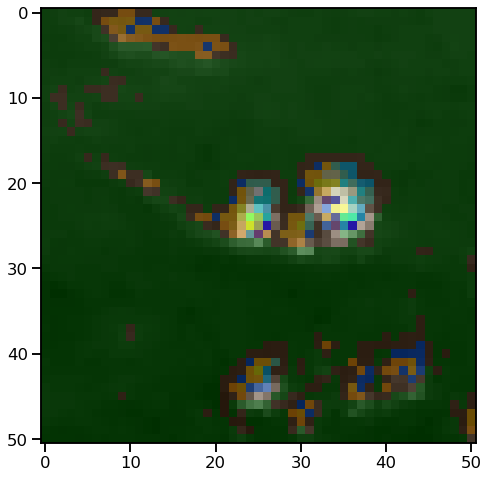

In [159]:
fig,ax= plt.subplots(1,1,figsize=(8,8))
ax.imshow(example_case_data['ir108'][6],vmin=210,vmax=300,cmap=emap)
ax.imshow(example_case_data['ct'][6],alpha=0.4,norm=norm_ct,cmap=cmap_ct)

So eine Scheiße! Die NWCSAF-Produkte sind nicht parallaxenkorrigiert!